In [5]:
import glob
import shutil
import cv2
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
import PIL
import shutil

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
base_dir = os.path.join('Dataset')

train_dir = os.path.join(base_dir, 'train')
train_img_dir = os.path.join(train_dir, 'images')
train_label_dir = os.path.join(train_dir, 'labels')

test_dir = os.path.join(base_dir, 'valid')
test_img_dir = os.path.join(test_dir, 'images')
test_label_dir = os.path.join(test_dir, 'labels')

In [8]:
def create_dir(path):
    if not os.path.exists(path):
        os.mkdir(path)

In [9]:
create_dir(base_dir)

create_dir(train_dir)
create_dir(train_img_dir)
create_dir(train_label_dir)

create_dir(test_dir)
create_dir(test_img_dir)
create_dir(test_label_dir)

In [10]:
dataset_path = '/content/drive/Shareddrives/Capstone Dataset/Dataset'

In [11]:
fruit_count=[]
fruit_name=[]
for i in os.listdir(dataset_path+'/train'):
    fruit_name.append(i)
    fruit_count.append(len(os.listdir(os.path.join(dataset_path+'/train', i))))

In [12]:
fruit_df = pd.DataFrame({'fruit_name':fruit_name, 'fruit_count':fruit_count})

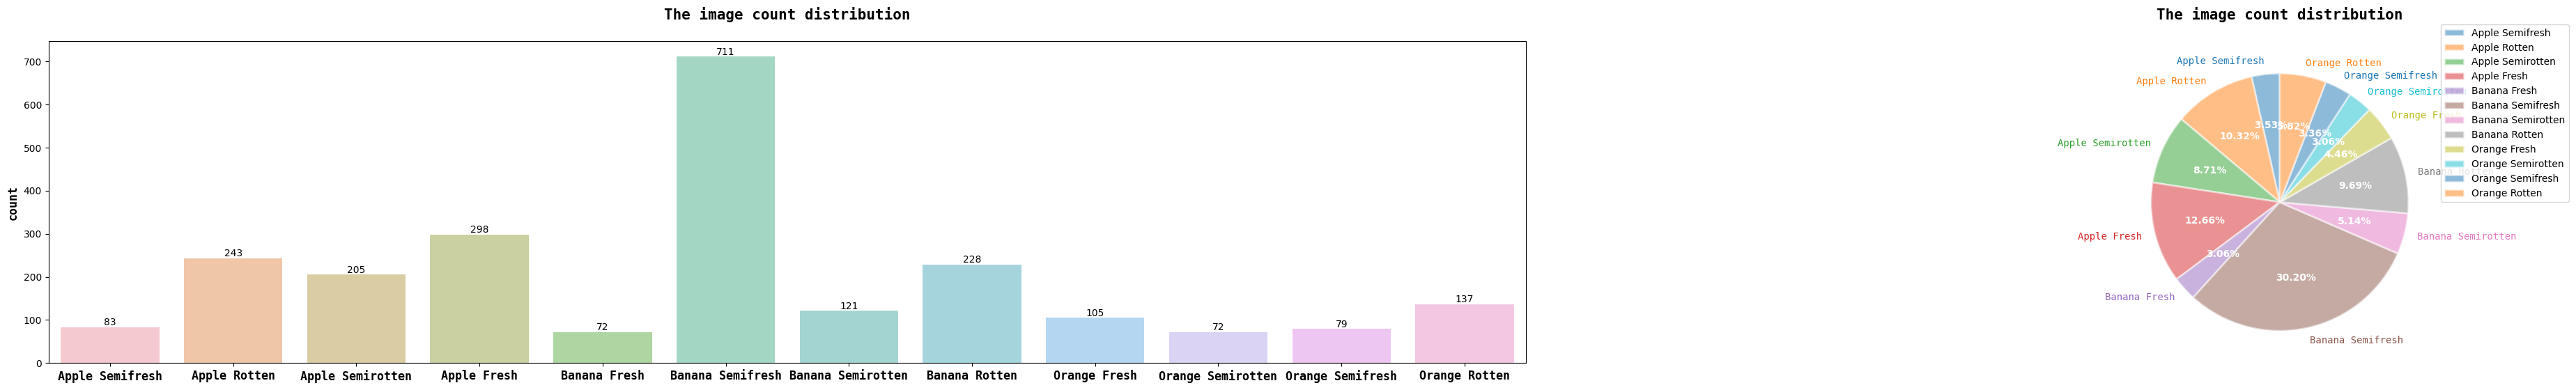

In [13]:
fig,axes = plt.subplots(1,2,figsize=(55,6), gridspec_kw=dict(wspace=0.01))
sns.barplot(data=fruit_df, x='fruit_name', y='fruit_count',ax=axes[0], alpha=0.5)
for i in axes[0].get_xticklabels():
    i.set_font('monospace')
    i.set_weight('semibold')
    i.set_size(12)
for j in axes[0].containers:
    axes[0].bar_label(j)

axes[0].set_xlabel('')
axes[0].set_ylabel('count', font='monospace', weight='semibold', size=12)
axes[0].set_title('The image count distribution\n', font='monospace', weight='semibold', size=15)

patches, texts, pcts = axes[1].pie(fruit_df['fruit_count'], labels=fruit_df['fruit_name'], wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
            textprops={'size': 'x-large'}, startangle=90, autopct='%1.2f%%');
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
    patch.set_alpha(0.5)
for j in pcts:
    j.set_size(10)
    j.set_color('white')
    j.set_weight('semibold')
plt.setp(texts, fontweight='semibold', font='monospace')
axes[1].legend(loc=[1,0.5])
axes[1].set_title('The image count distribution\n', font='monospace', weight='semibold', size=15);

In [14]:
def get_image_range(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower = np.array([0, 0, 0], dtype = "uint8")
    upper = np.array([255, 50, 255], dtype = "uint8")
    img = cv2.inRange(img, lower, upper)
    img = cv2.blur(img, (2, 2))
    ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)
    img = cv2.bitwise_not(thresh)
    contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = max(contours, key=lambda x: cv2.contourArea(x))

    #get bounding box posotion
    xmin, ymin, xmax, ymax = cv2.boundingRect(contours)

    #get the original width,height of the image
    dimensions = img.shape
    h = img.shape[0]
    w = img.shape[1]

    #to calculate the bndBox info of this image for yolo
    xp = (xmin + (xmax-xmin)/2) * 1.0 / w
    yp = (ymin + (ymax-ymin)/2) * 1.0 / h
    wp = (xmax-xmin) * 1.0 / w
    hp = (ymax-ymin) * 1.0 / h
    return xp, yp, wp, hp

In [15]:
for dirname, _, filenames in os.walk(dataset_path):
    if dirname[1:].split('/')[-2]=='train':
        for img_path in glob.glob(dirname+'/*.jpg'):
            shutil.copy(img_path, os.path.join(train_img_dir, img_path.split('/')[-1]))
            label=0
            if img_path.split('/')[-2] == 'Apple Fresh':
                label=0
            elif img_path.split('/')[-2] == 'Apple Rotten':
                label=1
            elif img_path.split('/')[-2] == 'Apple Semifresh':
                label=2
            elif img_path.split('/')[-2] == 'Apple Semirotten':
                label=3
            elif img_path.split('/')[-2] == 'Banana Fresh':
                label=4
            elif img_path.split('/')[-2] == 'Banana Rotten':
                label=5
            elif img_path.split('/')[-2] == 'Banana Semifresh':
                label=6
            elif img_path.split('/')[-2] == 'Banana Semirotten':
                label=7
            elif img_path.split('/')[-2] == 'Orange Fresh':
                label=8
            elif img_path.split('/')[-2] == 'Orange Rotten':
                label=9
            elif img_path.split('/')[-2] == 'Orange Semirotten':
                label=10
            elif img_path.split('/')[-2] == 'Orange Semifresh':
                label=11

            x_center, y_center, box_width, box_height = get_image_range(img_path)
            text = str(label)+' '+str(x_center)+' '+str(y_center)+' '+str(box_width)+' '+str(box_height)
            with open (os.path.join(train_label_dir, img_path.split('/')[-1][:-4]+'.txt'),'w') as file:
                file.write(text)

    if dirname[1:].split('/')[-2]=='valid':
        for img_path in glob.glob(dirname+'/*.jpg'):
            shutil.copy(img_path, os.path.join(test_img_dir, img_path.split('/')[-1]))
            label=0
            if img_path.split('/')[-2] == 'Apple Fresh':
                label=0
            elif img_path.split('/')[-2] == 'Apple Rotten':
                label=1
            elif img_path.split('/')[-2] == 'Apple Semifresh':
                label=2
            elif img_path.split('/')[-2] == 'Apple Semirotten':
                label=3
            elif img_path.split('/')[-2] == 'Banana Fresh':
                label=4
            elif img_path.split('/')[-2] == 'Banana Rotten':
                label=5
            elif img_path.split('/')[-2] == 'Banana Semifresh':
                label=6
            elif img_path.split('/')[-2] == 'Banana Semirotten':
                label=7
            elif img_path.split('/')[-2] == 'Orange Fresh':
                label=8
            elif img_path.split('/')[-2] == 'Orange Rotten':
                label=9
            elif img_path.split('/')[-2] == 'Orange Semirotten':
                label=10
            elif img_path.split('/')[-2] == 'Orange Semifresh':
                label=11
            x_center, y_center, box_width, box_height = get_image_range(img_path)
            text = str(label)+' '+str(x_center)+' '+str(y_center)+' '+str(box_width)+' '+str(box_height)
            with open (os.path.join(test_label_dir, img_path.split('/')[-1][:-4]+'.txt'),'w') as file:
                file.write(text)

In [16]:
print(f'There are {len(os.listdir(train_img_dir))} train images')
print(f'There are {len(os.listdir(train_label_dir))} corresponding train labels\n')

print(f'There are {len(os.listdir(test_img_dir))} test images')
print(f'There are {len(os.listdir(test_label_dir))} corresponding test labels')

There are 2342 train images
There are 2342 corresponding train labels

There are 1014 test images
There are 1014 corresponding test labels


In [17]:
df = pd.DataFrame({'file':['train', 'valid'], 'count':[len(os.listdir(train_img_dir)),len(os.listdir(test_img_dir))]})

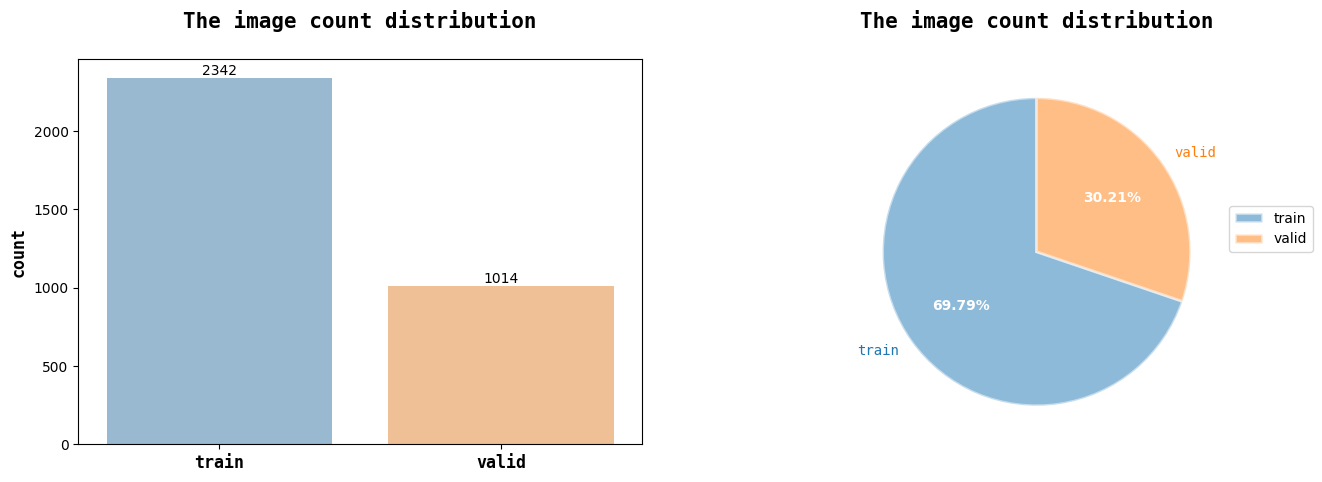

In [18]:

fig,axes = plt.subplots(1,2,figsize=(16,5))
sns.barplot(data=df.reset_index(), x='file', y='count',ax=axes[0], alpha=0.5)
for i in axes[0].get_xticklabels():
    i.set_font('monospace')
    i.set_weight('semibold')
    i.set_size(12)
for j in axes[0].containers:
    axes[0].bar_label(j)

axes[0].set_xlabel('')
axes[0].set_ylabel('count', font='monospace', weight='semibold', size=12)
axes[0].set_title('The image count distribution\n', font='monospace', weight='semibold', size=15)

patches, texts, pcts = axes[1].pie(df['count'], labels=df['file'], wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
            textprops={'size': 'x-large'}, startangle=90, autopct='%1.2f%%');
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
    patch.set_alpha(0.5)
for j in pcts:
    j.set_size(10)
    j.set_color('white')
    j.set_weight('semibold')
plt.setp(texts, fontweight='semibold', font='monospace')
axes[1].legend(loc=[1,0.5])
axes[1].set_title('The image count distribution\n', font='monospace', weight='semibold', size=15);

In [19]:
# for path in os.listdir(train_img_dir):
#     if 'mold' in path:
#         os.remove(os.path.join(train_img_dir, path))
    # elif 'banana' in path:
    #     os.remove(os.path.join(train_img_dir, path))


In [20]:
# for path in os.listdir(test_label_dir):
#     if 'mold' in path:
#         os.remove(os.path.join(test_label_dir, path))


In [21]:
plan_to_delete_from_train = random.sample([i for i in os.listdir(train_img_dir)], 210)
plan_to_delete_from_test = random.sample([i for i in os.listdir(test_img_dir)], 98)

In [22]:
for i in plan_to_delete_from_train:
    os.remove(os.path.join(train_img_dir, i))
    os.remove(os.path.join(train_label_dir, i[:-4]+'.txt'))

In [23]:
for i in plan_to_delete_from_test:
    os.remove(os.path.join(test_img_dir, i))
    os.remove(os.path.join(test_label_dir, i[:-4]+'.txt'))

In [24]:
print(f'There are {len(os.listdir(train_img_dir))} train images')
print(f'There are {len(os.listdir(train_label_dir))} corresponding train labels\n')

print(f'There are {len(os.listdir(test_img_dir))} train images')
print(f'There are {len(os.listdir(test_label_dir))} corresponding test labels')

There are 2132 train images
There are 2132 corresponding train labels

There are 916 train images
There are 916 corresponding test labels


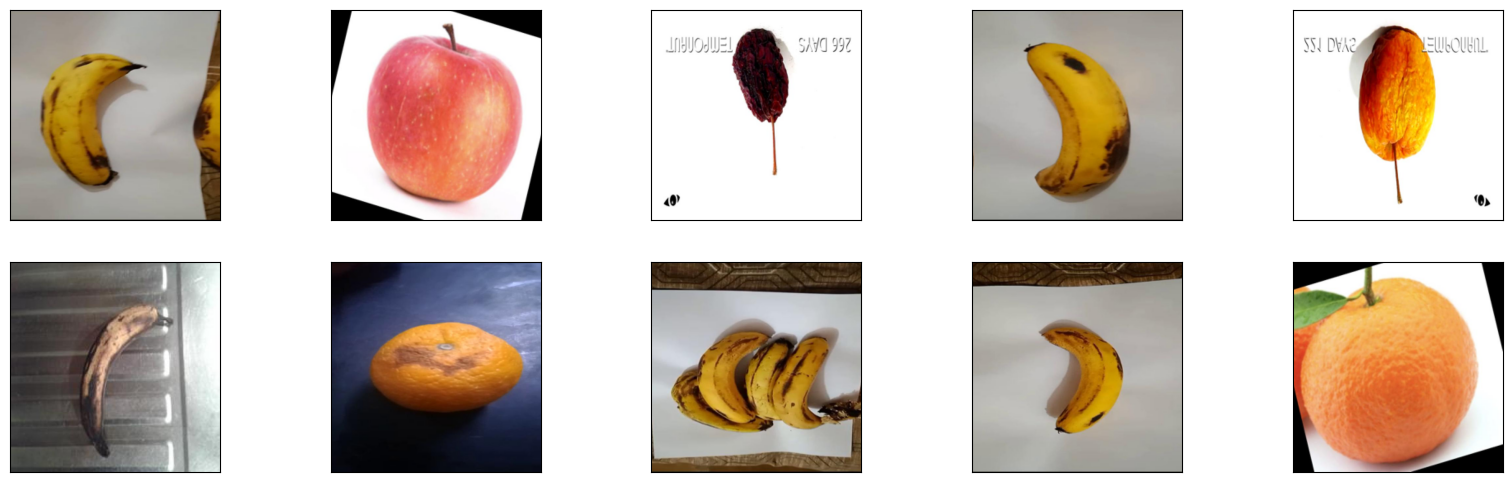

In [25]:
img_path=[]
selected_img = random.sample([i for i in os.listdir(train_img_dir)], 10)
for i in selected_img:
    img_path.append(os.path.join(train_img_dir, i))


fig, axes = plt.subplots(2,5, figsize=(20,6), subplot_kw=dict(xticks=[], yticks=[]))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(PIL.Image.open(img_path[i])))

In [26]:
yaml_file = """names:
- Apple Fresh
- Apple Rotten
- Apple Semifresh
- Apple Semirotten
- Banana Fresh
- Banana Rotten
- Banana Semifresh
- Banana Semirotten
- Orange Fresh
- Orange Rotten
- Orange Semifresh
- Orange Semirotten

nc: 12

train: /content/Dataset/train
val: /content/Dataset/train
"""
yaml_file_path = 'Dataset/data.yaml'

os.makedirs(os.path.dirname(yaml_file_path), exist_ok=True)

with open(yaml_file_path, 'w') as f:
    f.write(yaml_file)

In [27]:
with open(os.path.join(train_label_dir, os.listdir(train_label_dir)[0]),'r') as f:
    c = f.read()
    print(c)

6 0.47265625 0.43046875 0.7296875 0.4046875


In [28]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.1/660.1 kB 5.3 MB/s eta 0:00:00


In [29]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output
! yolo checks

Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.2/78.2 GB disk)

OS                  Linux-5.15.120+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.68 GB
CPU                 Intel Xeon 2.30GHz
CUDA                11.8

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.0+cu118>=1.8.0
torchvision         ✅ 0.16.0+cu118>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


In [30]:
# conda install pytorch torchvision torchaudio -c pytorch

In [31]:
! yolo task=detect mode=train model=yolov8x.pt data= /content/Dataset/data.yaml epochs=8 imgsz=640

100% 131M/131M [00:00<00:00, 305MB/s]
Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/Dataset/data.yaml, epochs=8, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

In [32]:
os.listdir('/content/runs/detect/train')

['val_batch1_labels.jpg',
 'val_batch2_pred.jpg',
 'results.png',
 'train_batch0.jpg',
 'args.yaml',
 'P_curve.png',
 'val_batch2_labels.jpg',
 'val_batch0_pred.jpg',
 'weights',
 'confusion_matrix.png',
 'labels.jpg',
 'train_batch2.jpg',
 'confusion_matrix_normalized.png',
 'val_batch1_pred.jpg',
 'results.csv',
 'R_curve.png',
 'train_batch1.jpg',
 'labels_correlogram.jpg',
 'events.out.tfevents.1702214314.f73929e9e1fc.10972.0',
 'F1_curve.png',
 'val_batch0_labels.jpg',
 'PR_curve.png']

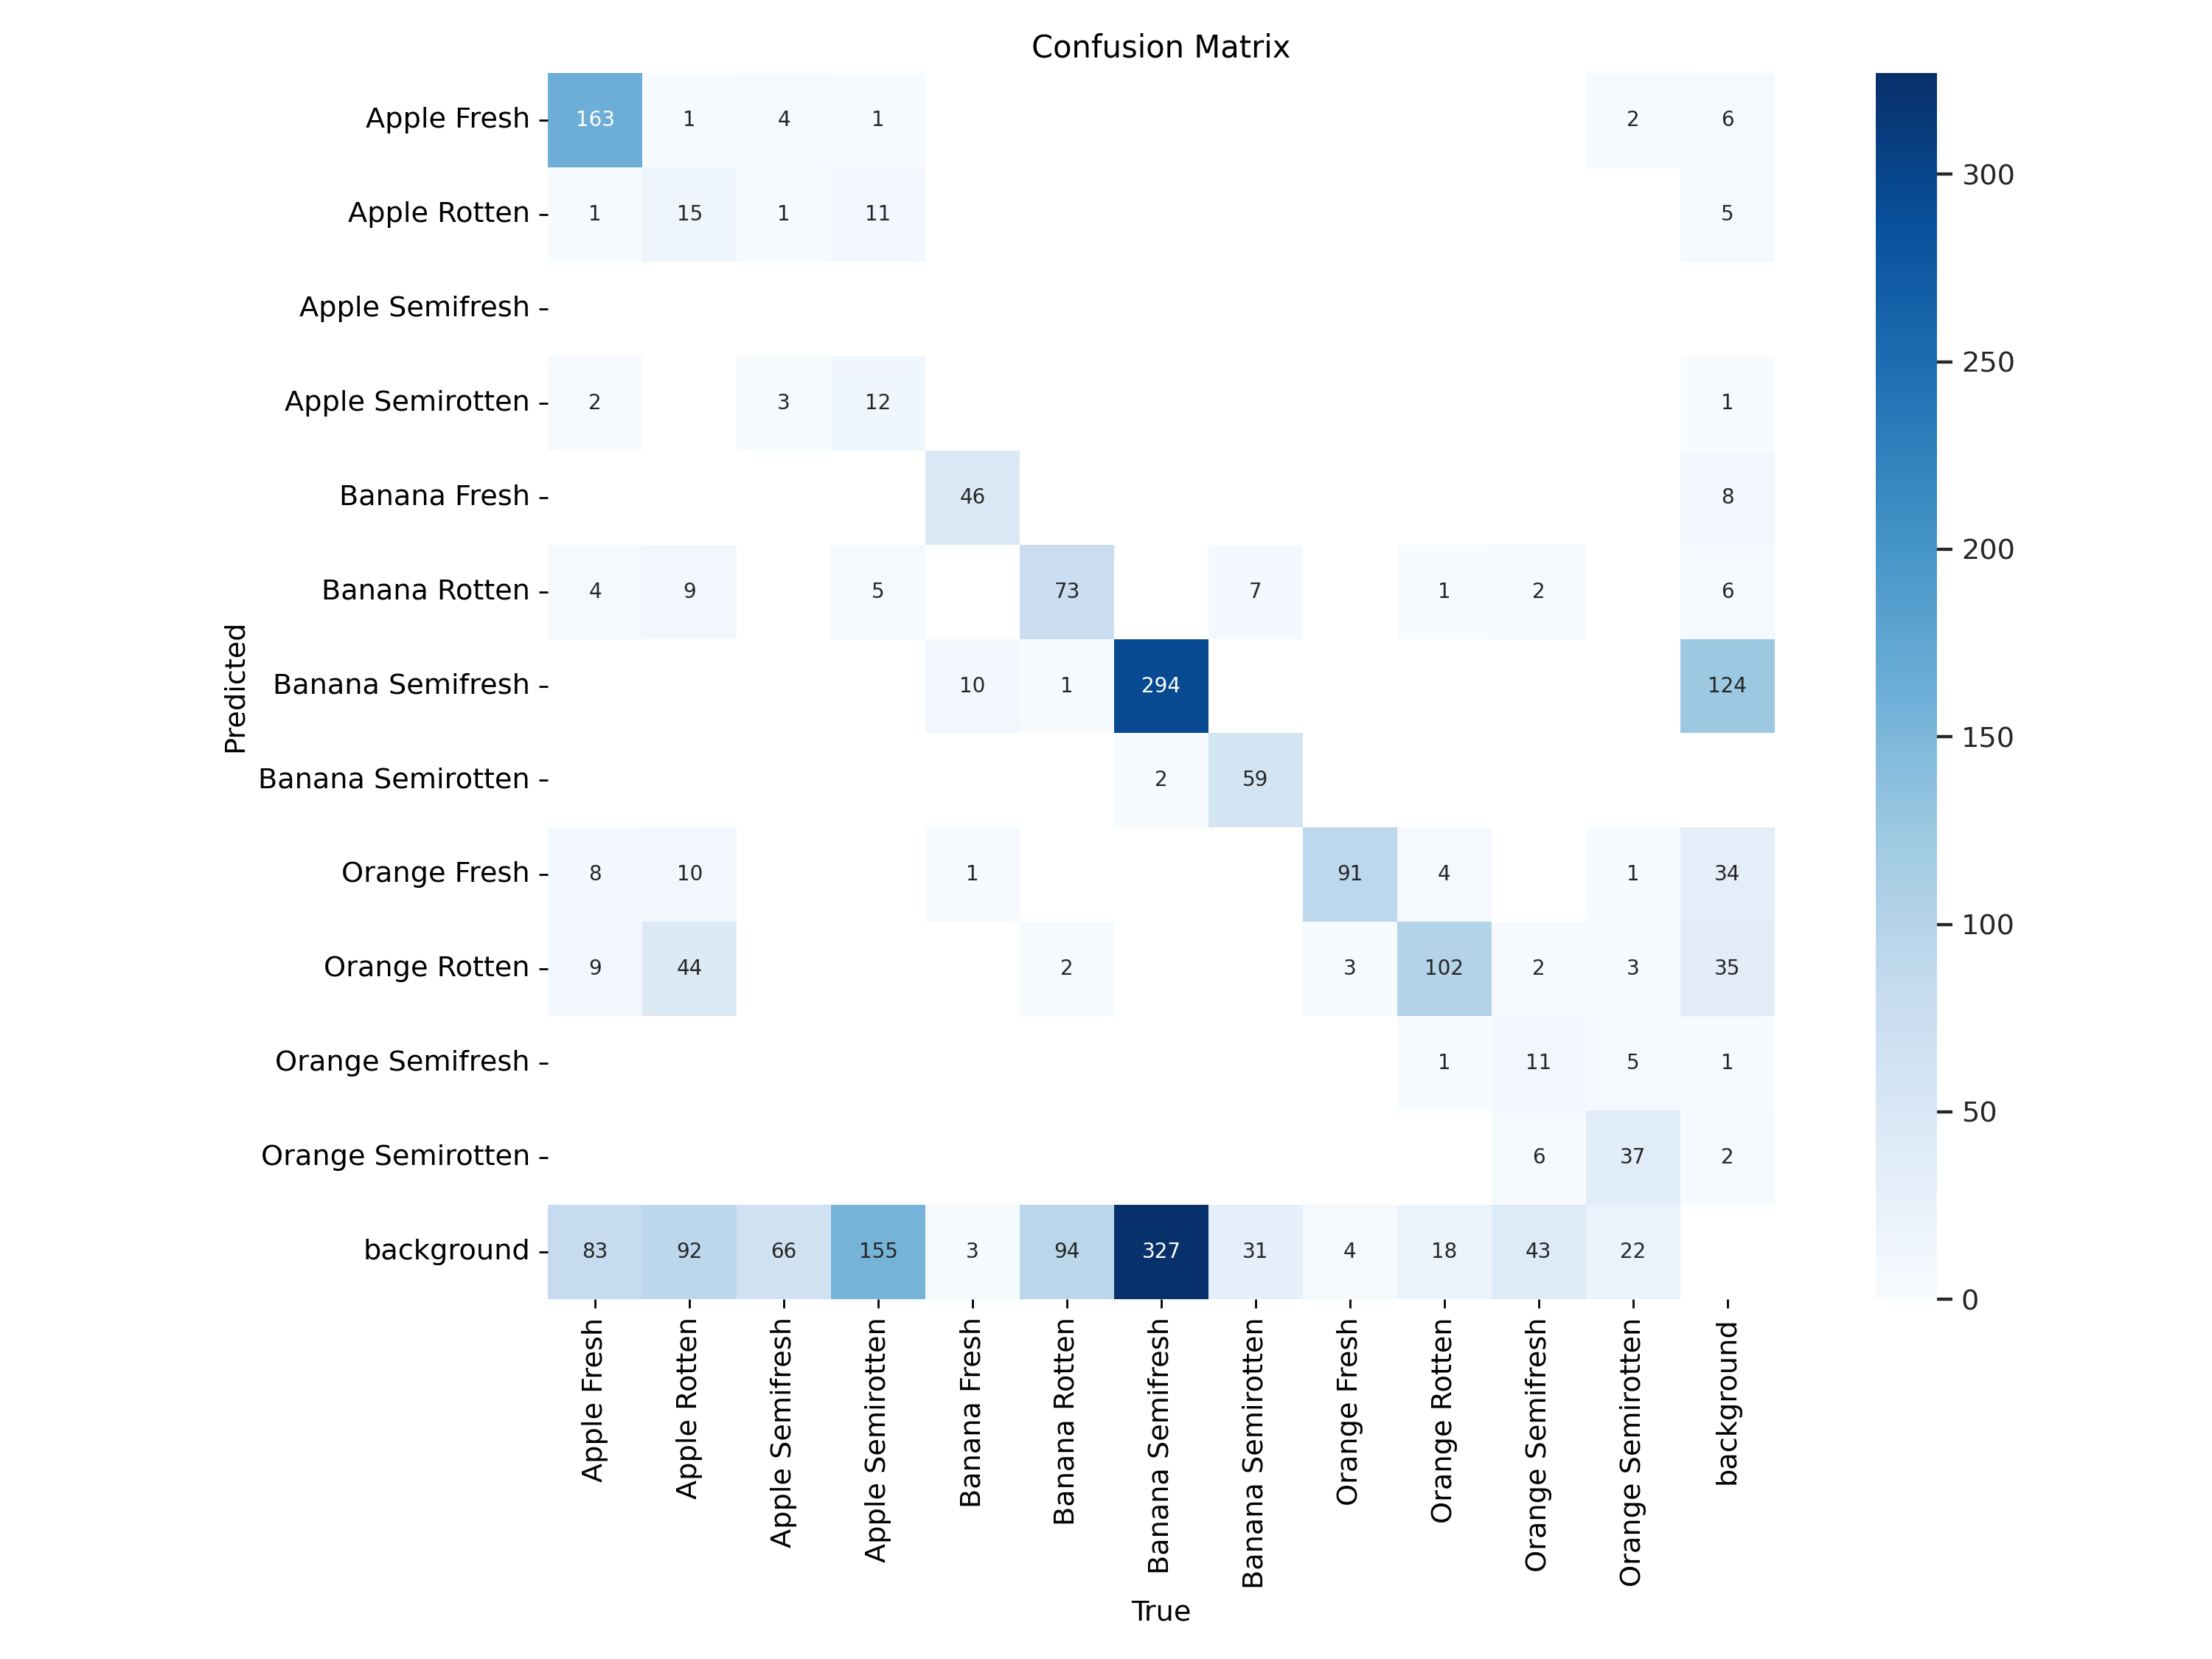

In [33]:
Image('/content/runs/detect/train/confusion_matrix.png')

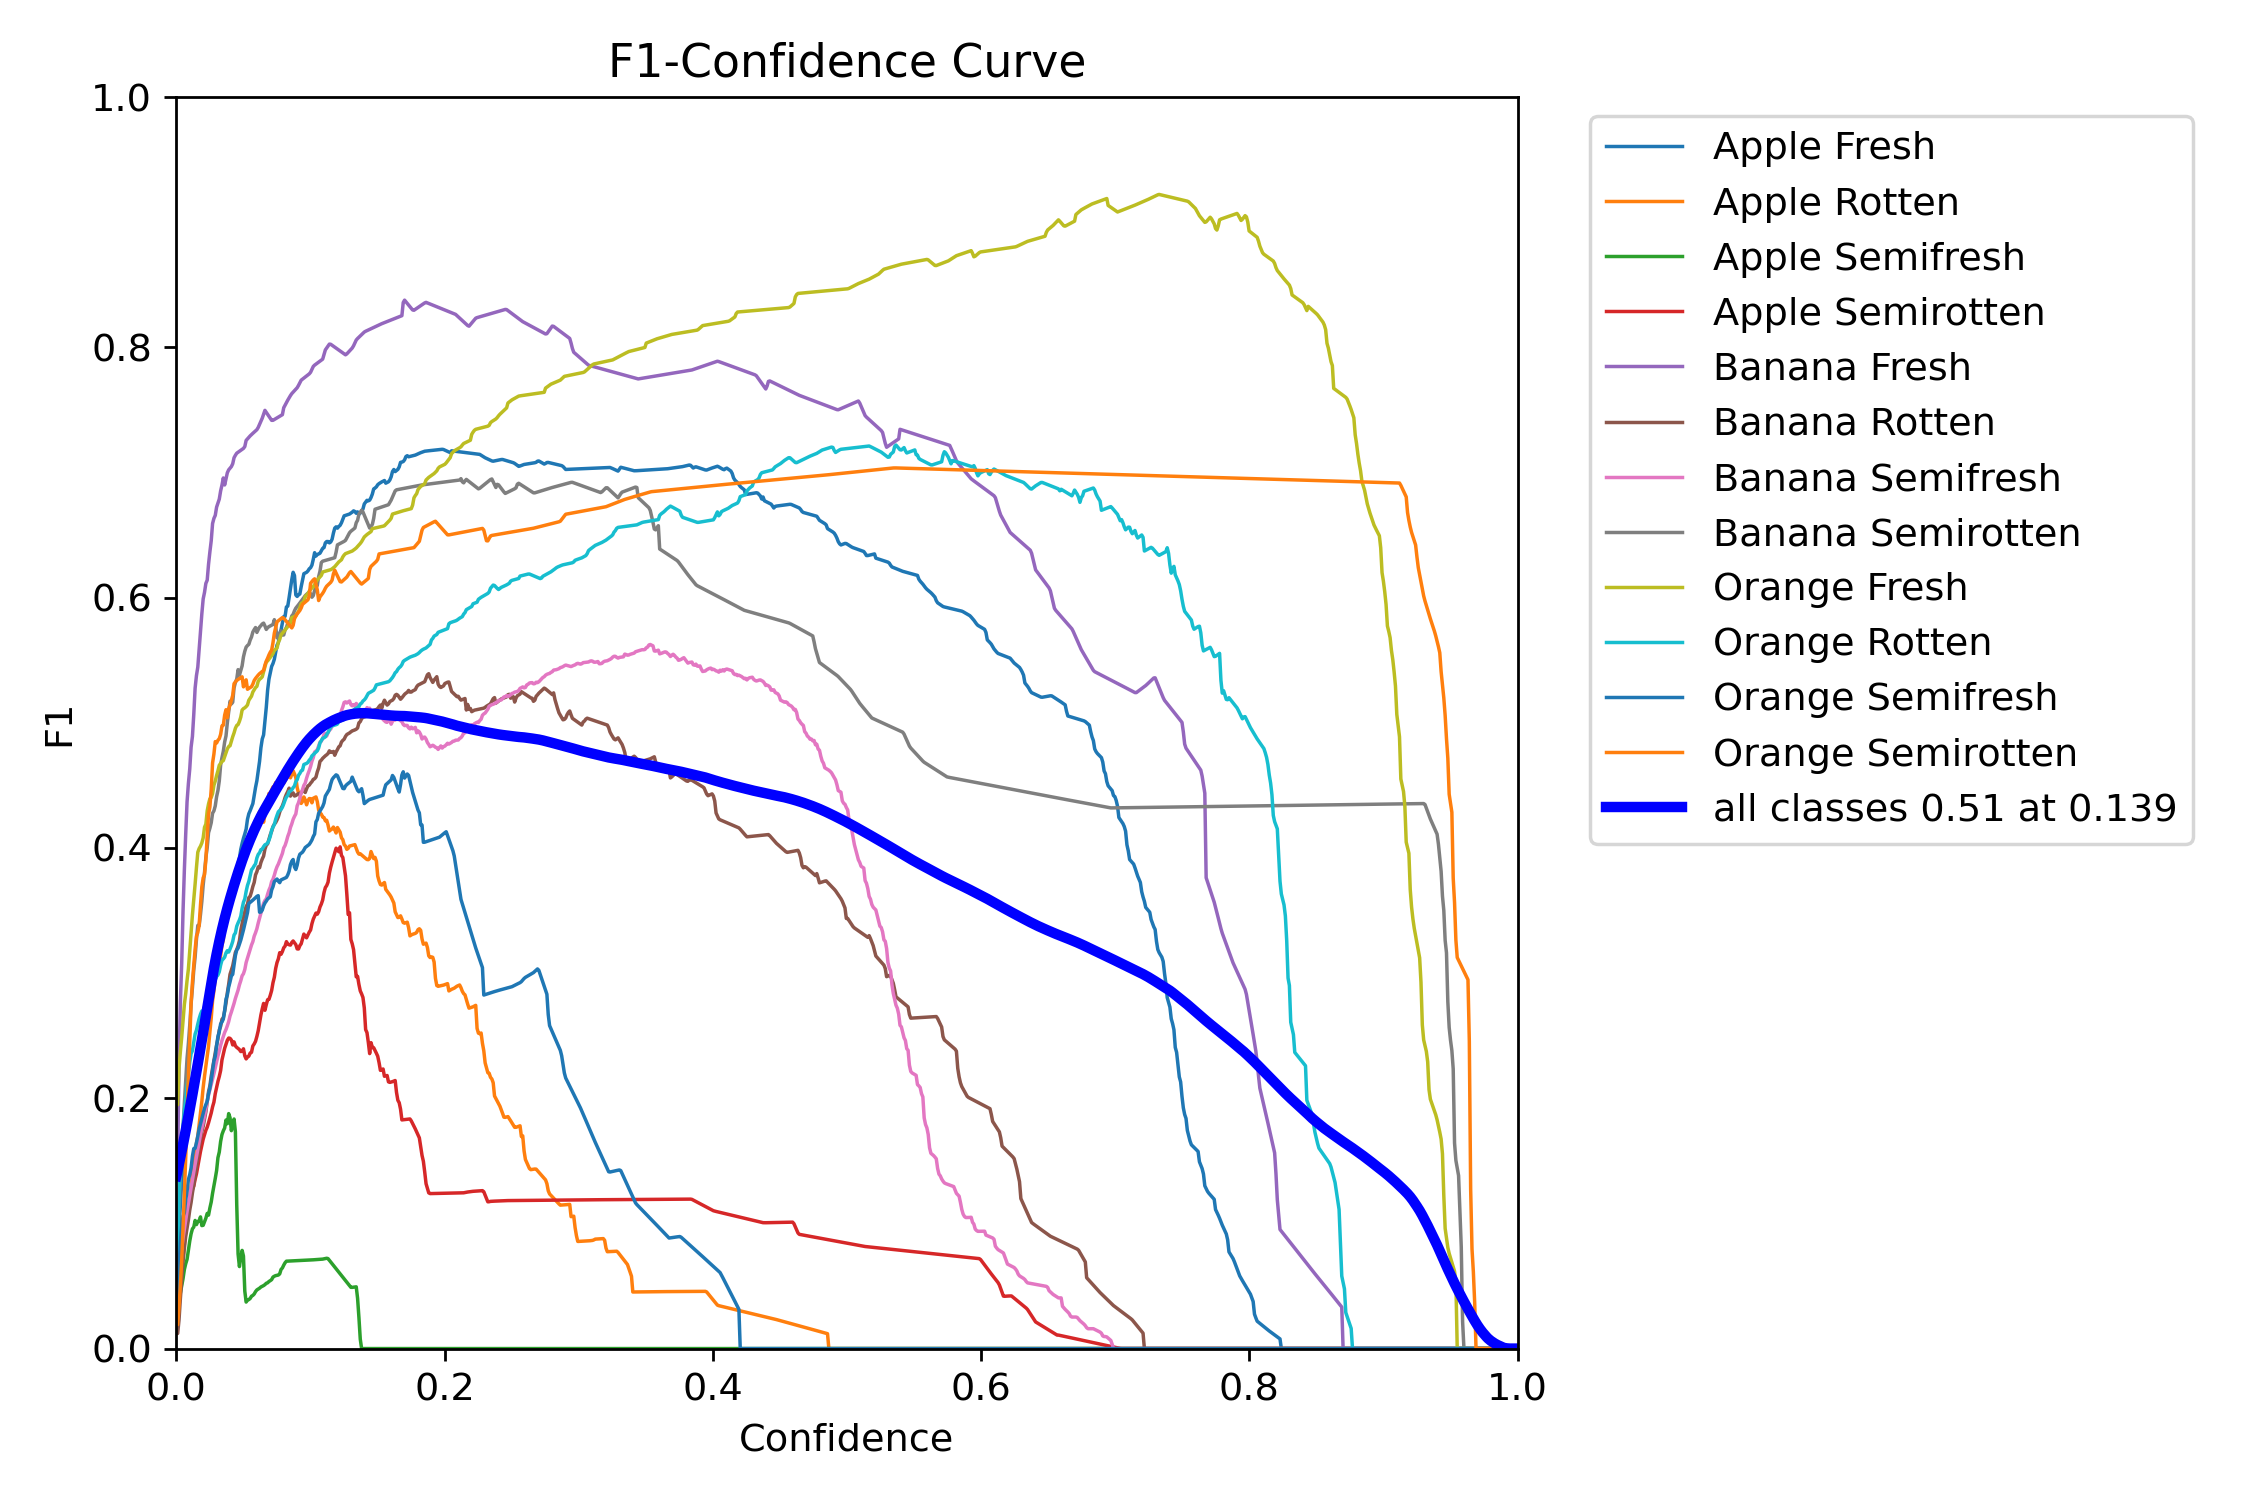

In [34]:
Image('/content/runs/detect/train/F1_curve.png')

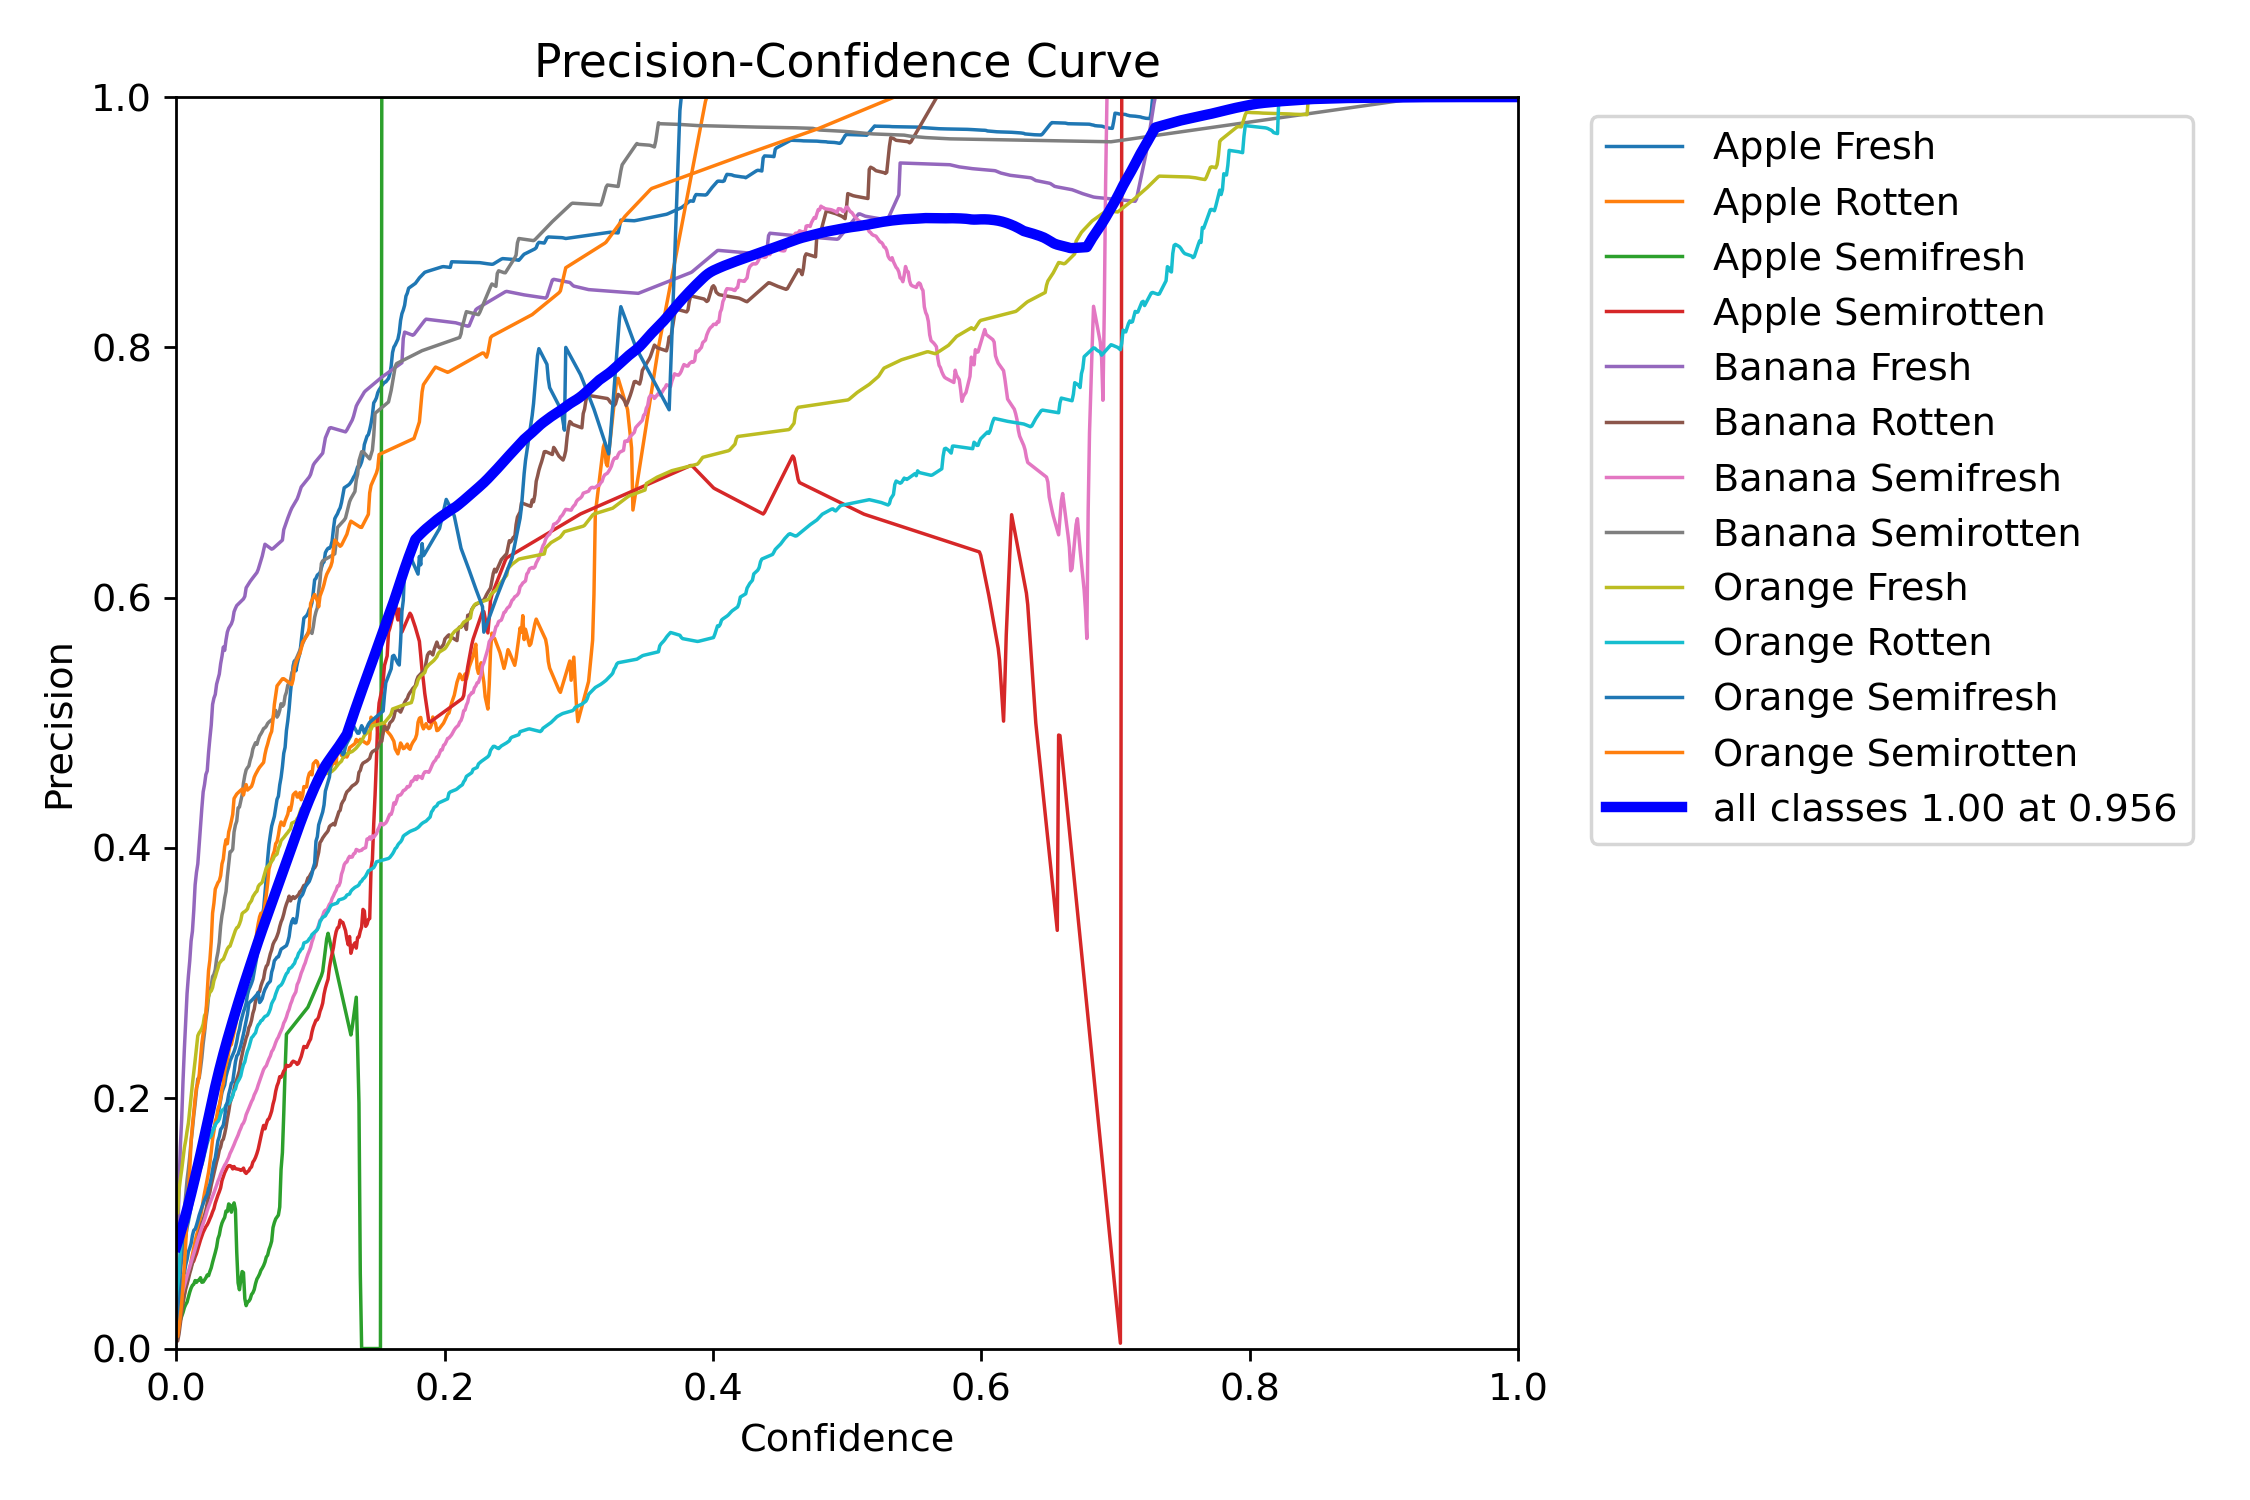

In [35]:
Image('/content/runs/detect/train/P_curve.png')

In [36]:
# ! yolo task=detect mode=val model=/content/runs/detect/train11 data=/content/Dataset/data.yaml

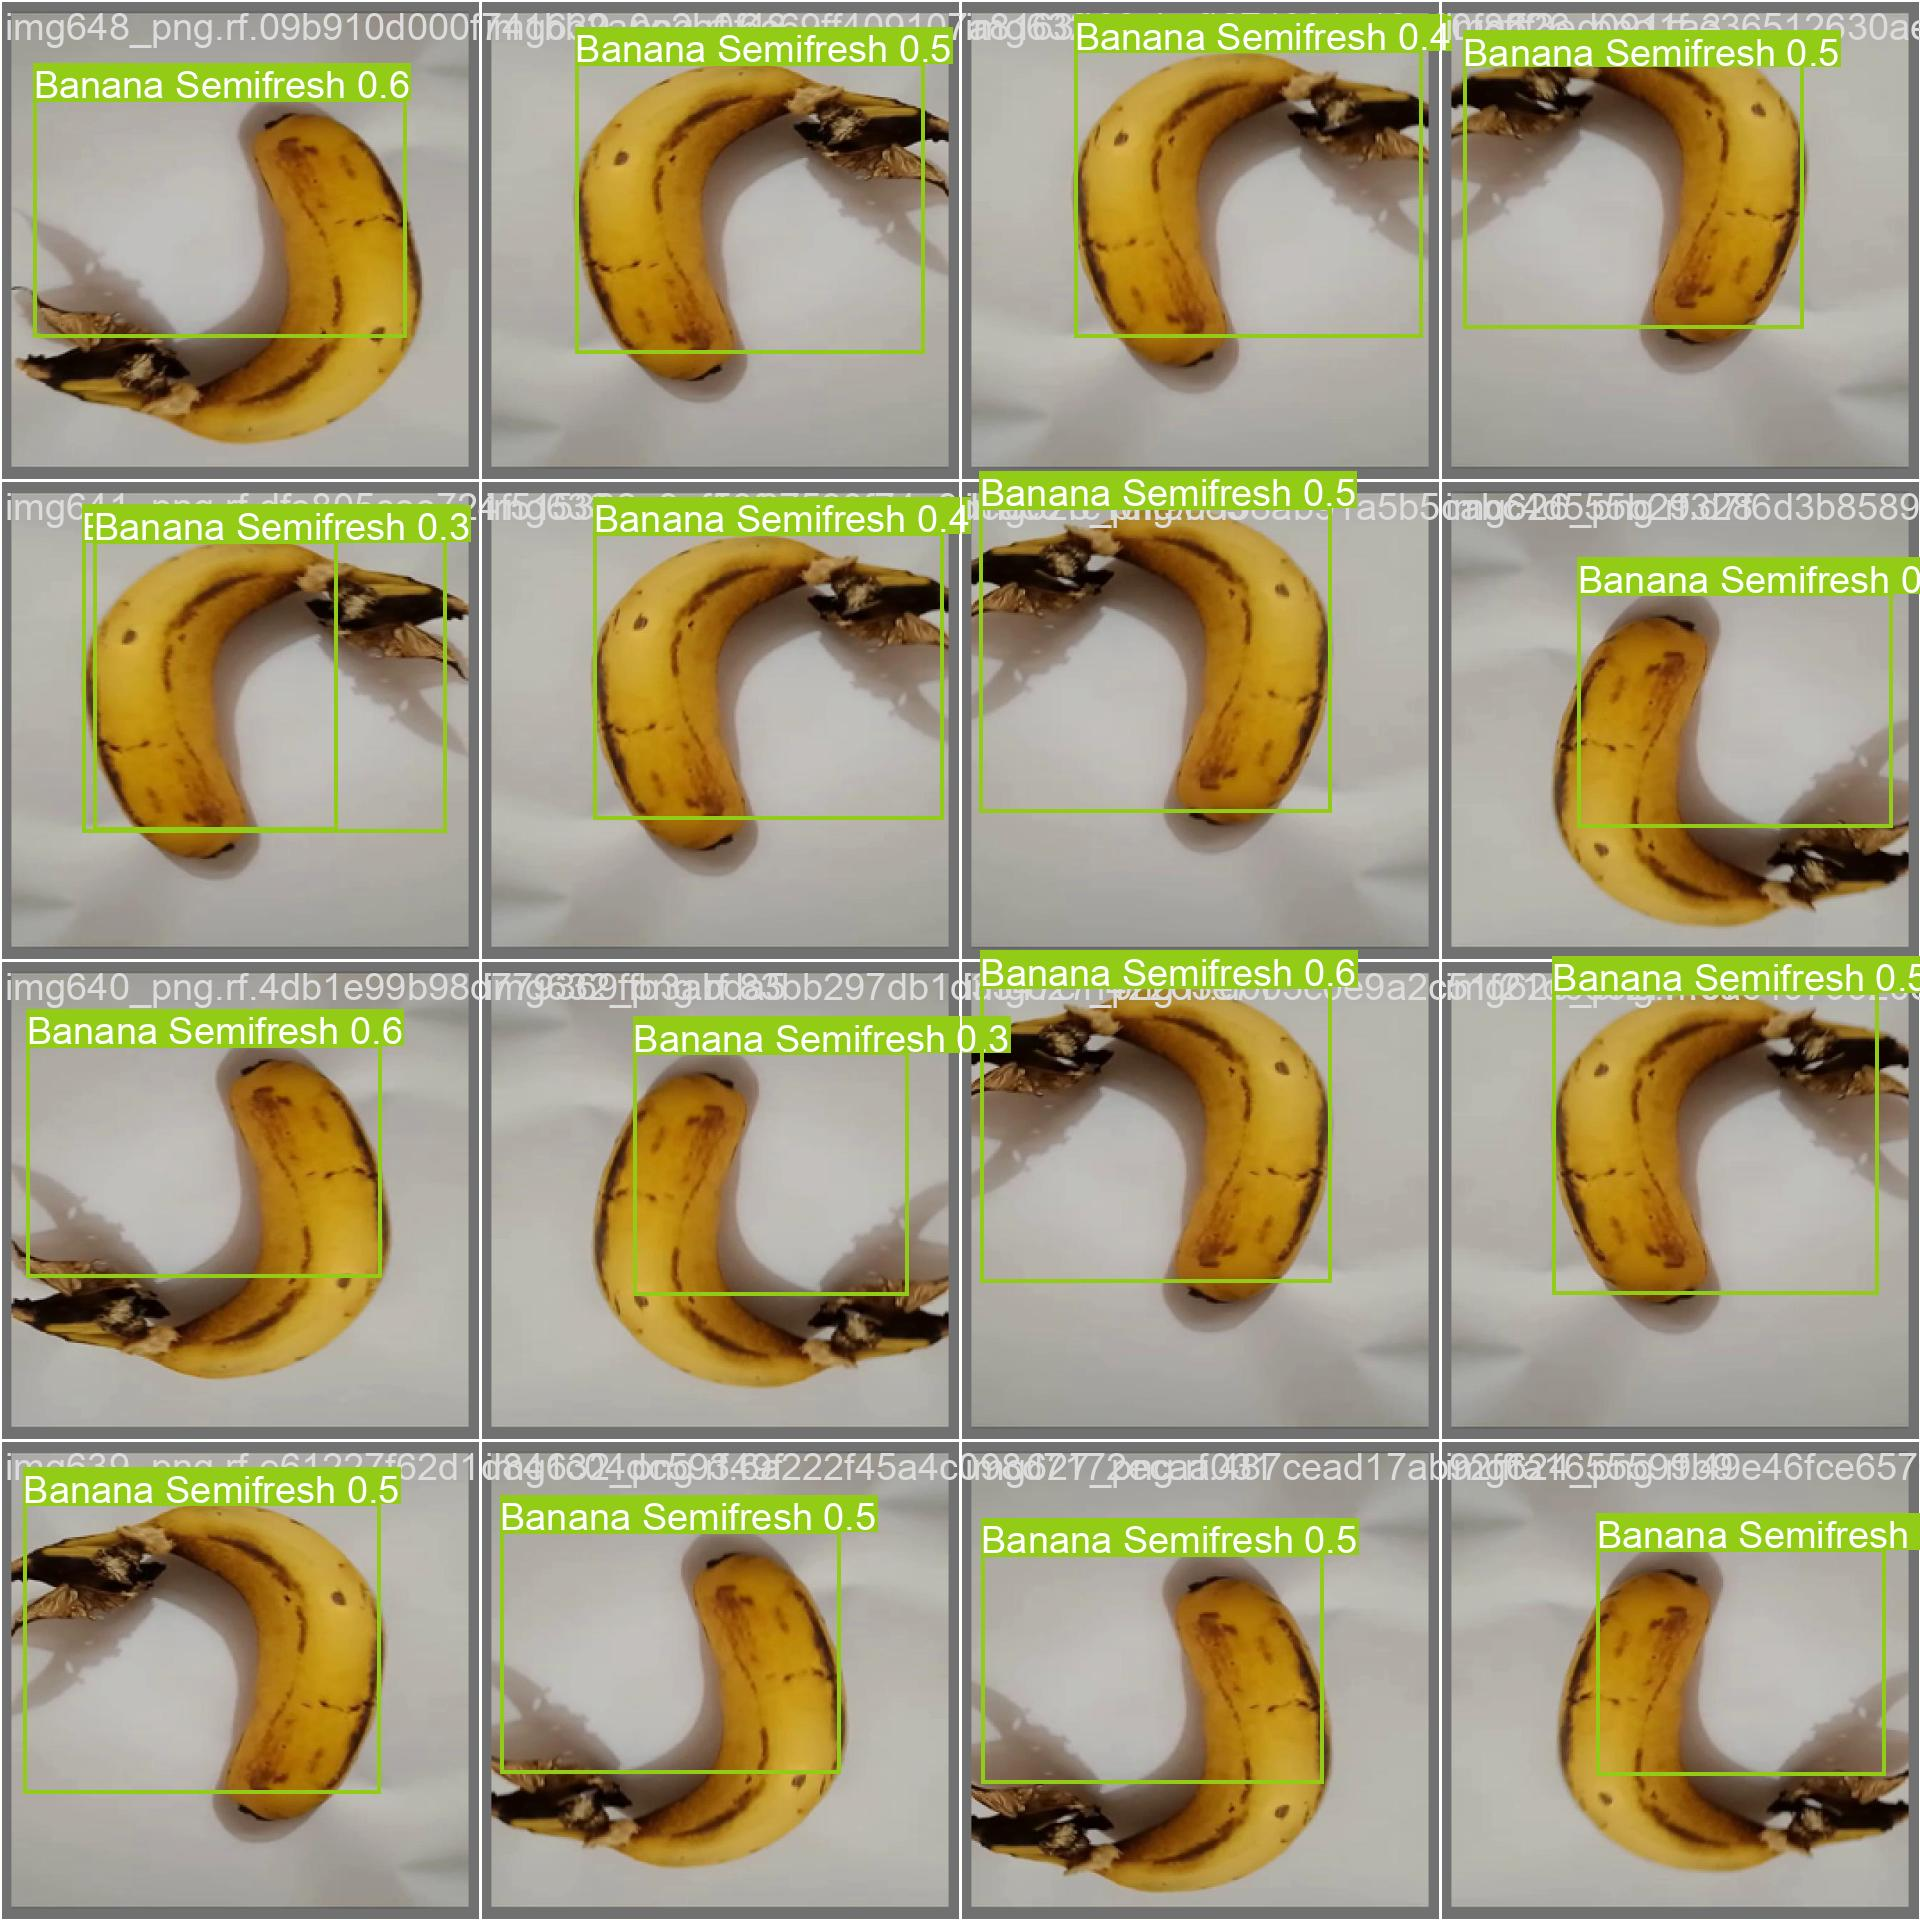

In [37]:
Image(filename = '/content/runs/detect/train/val_batch1_pred.jpg')

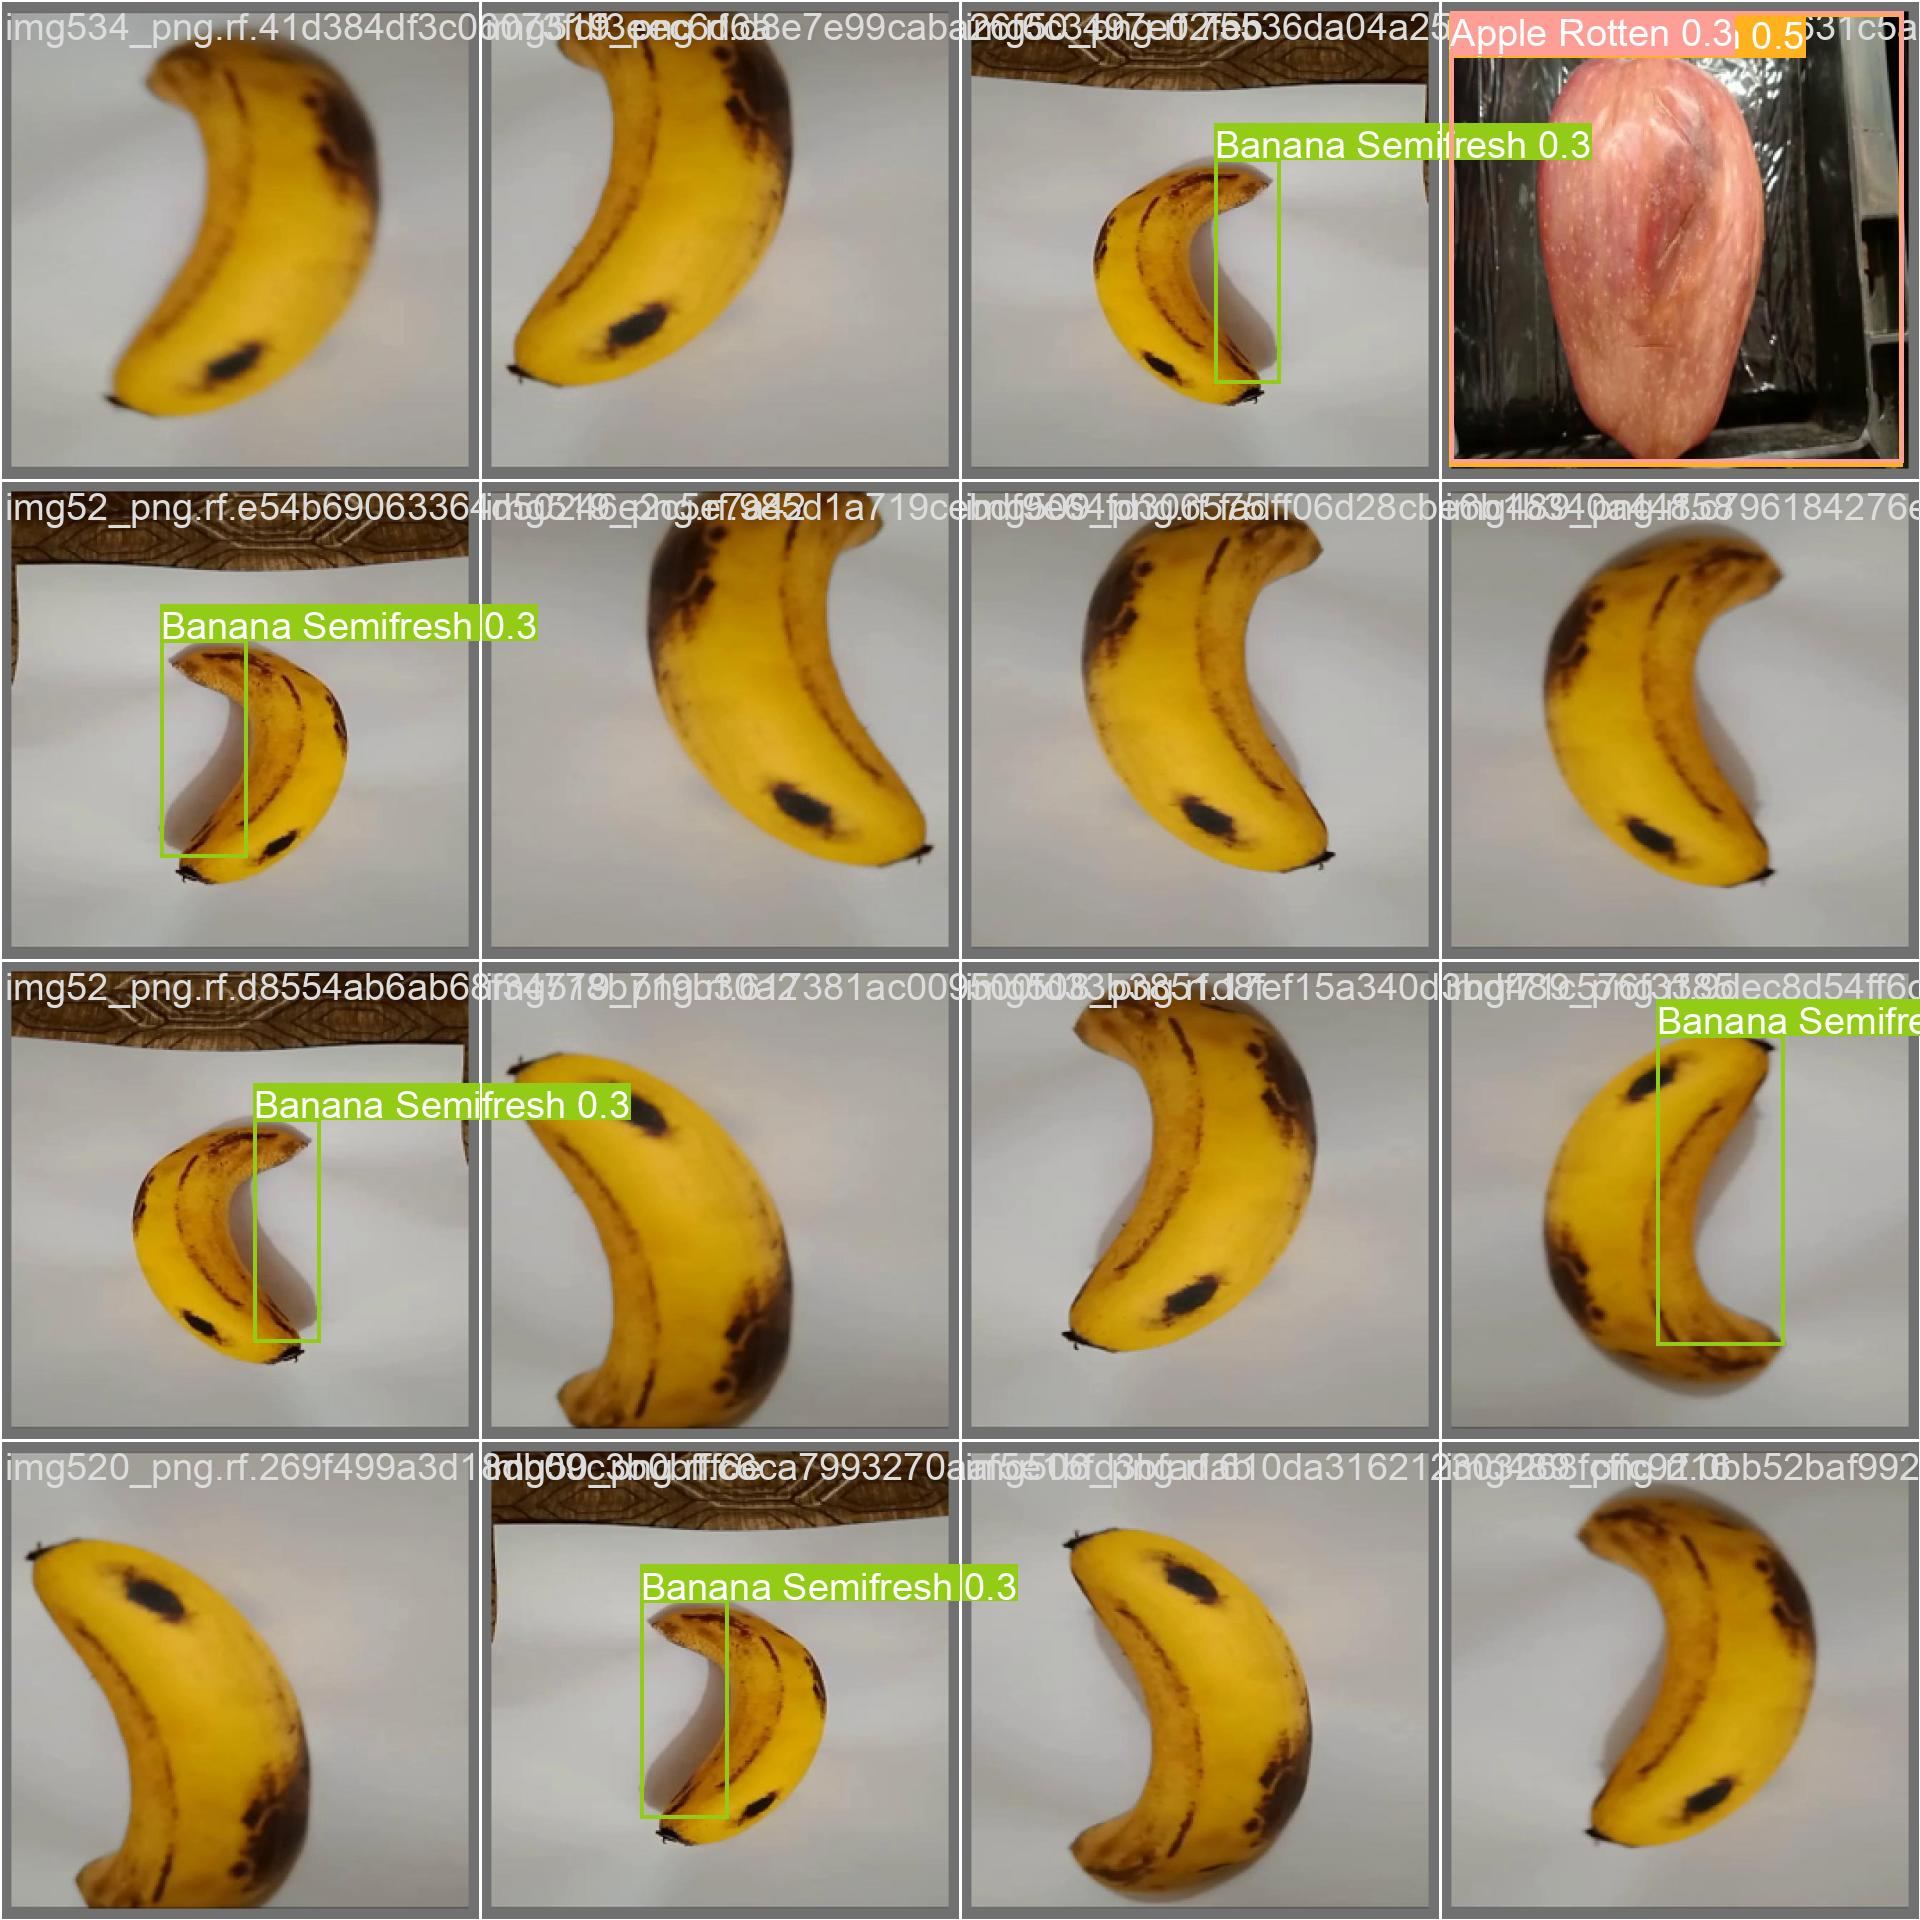

In [39]:
Image(filename = '/content/runs/detect/train/val_batch2_pred.jpg')

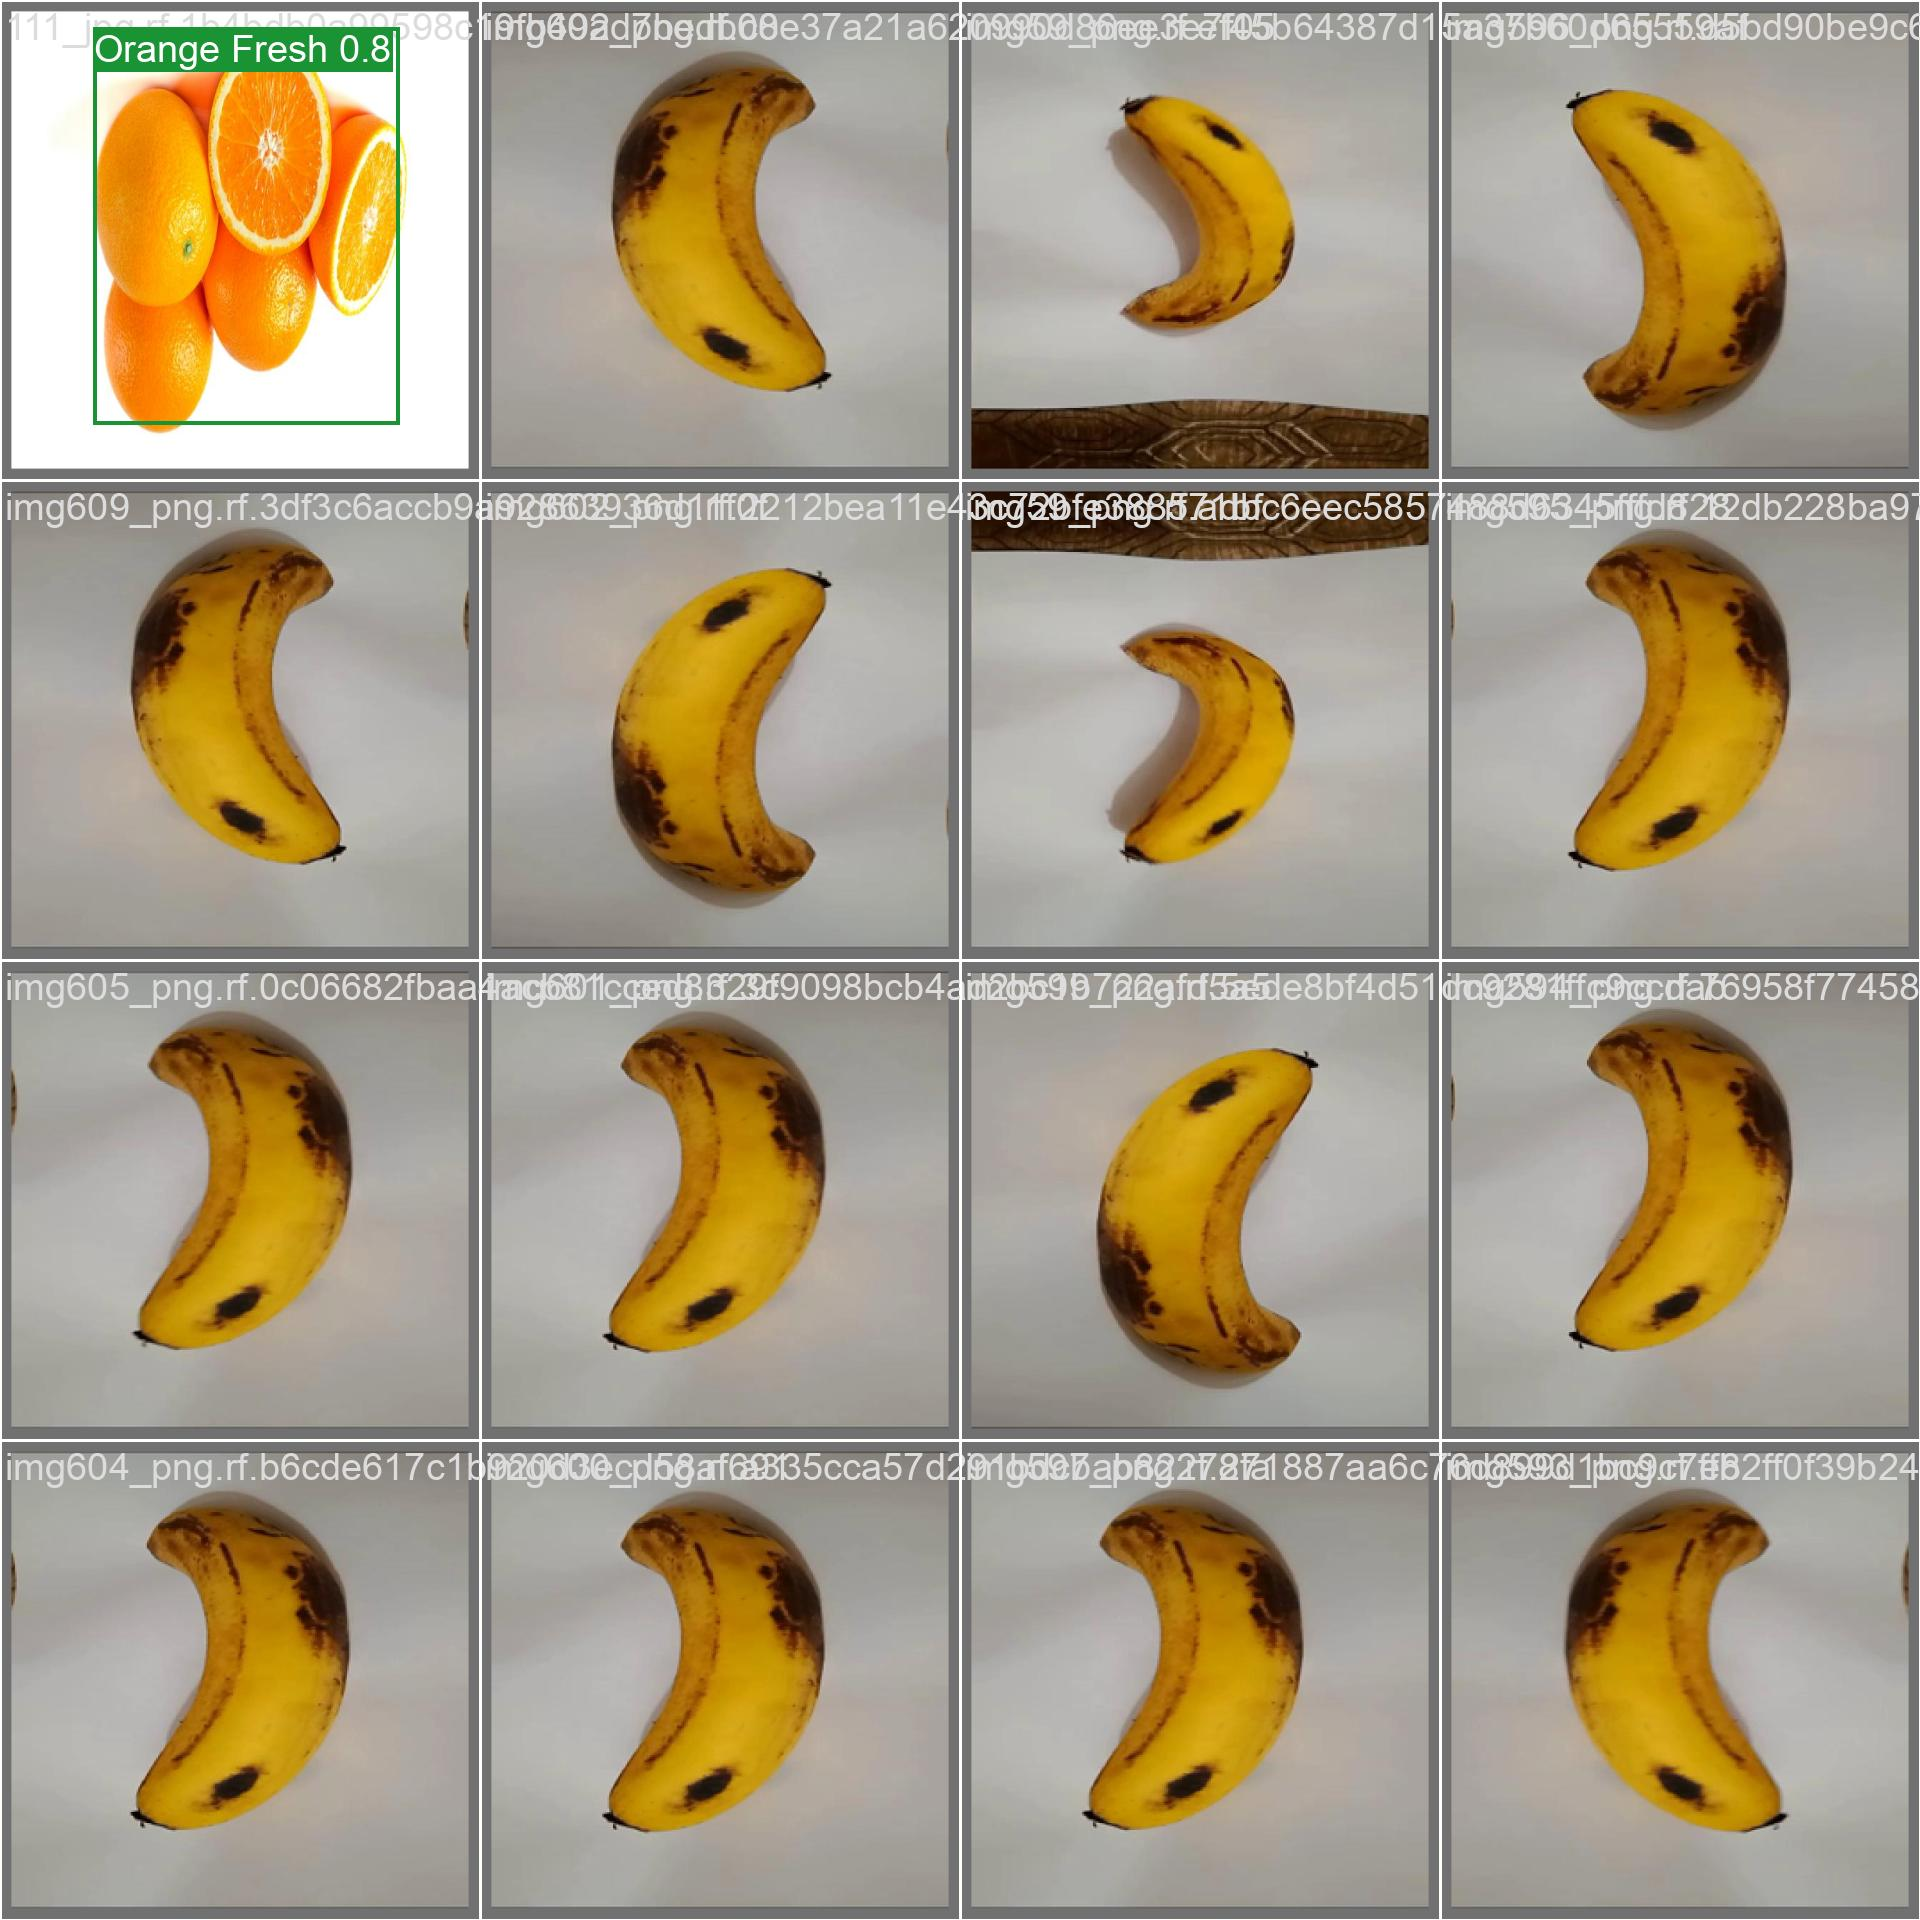

In [40]:
Image(filename = '/content/runs/detect/train/val_batch0_pred.jpg')

In [ ]:
# shutil.rmtree('/content/Dataset')
# shutil.rmtree

In [ ]:
# shutil.rmtree('/content/runs')

In [ ]:
import torch

In [ ]:
from ultralytics import YOLO

# Load a model
# model = YOLO('yolov8n-cls.pt')  # load an official model
model = YOLO('/content/runs/detect/train/weights/best.pt')  # load a custom model

# Predict with the model
results = model('image_path')  # predict on an image

In [42]:
uname = "rkismyname"
!git config --global user.email 'arkadiorjndra@gmail.com'
!git config --global user.name 'rkismyname'
!git init
!git clone https://github.com/CH2-PS595-Bangkit/fruition-model.git


# create a file, then add it to stage
!git add .
!git commit -m 'First try model creation, still has many flaws'  # commit in Colab
!git push origin main         # push to github

Reinitialized existing Git repository in /content/.git/
fatal: destination path 'fruition-model' already exists and is not an empty directory.
error: open("drive/MyDrive/Copy of [Product-based] Template Project Plan (1).gdoc"): Operation not supported
error: unable to index file 'drive/MyDrive/Copy of [Product-based] Template Project Plan (1).gdoc'
fatal: adding files failed
On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	Dataset/
	drive/
	fruition-model/
	runs/
	sample_data/
	yolov8n.pt
	yolov8x.pt

nothing added to commit but untracked files present (use "git add" to track)
error: src refspec main does not match any
error: failed to push some refs to 'origin'
